###### Content provided under a Creative Commons Attribution license, CC-BY 4.0; code under BSD 3-Clause license (c)2014 Lorena A. Barba, Olivier Mesnard. Thanks: NSF for support via CAREER award #1149784.

# Source Sheet

A source sheet is an infinite row of sources along one line. You have already created a vortex sheet by placing a [row of vortices](05_Lesson05_InfiniteRowOfVortices.ipynb) on one line, so you are ready for this.

Make sure that you have studied [*AeroPython* Lesson 7](07_Lesson07_methodOfImages.ipynb), on the Method of Images and the use of classes in Python. From now on, classes will feature prominently!

We start by importing our libraries and creating the grid of points, as we've done so many times before.

In [1]:
#import libraries
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [3]:
#vectors initialization

N = 100
x_start, x_end = -1.0, 1.0
y_start, y_end = -1.5, 1.5

x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)

X, Y = numpy.meshgrid(x, y)

We will include a uniform flow of magnitude $U_\infty = 0.5$ parallel to the horizontal axis. The arrays `u_freestream` and `v_freestream` contain the velocity components of the free stream. Let's fill these up:

In [4]:
#freestream velocity

u_inf = 0.5

#calculate velocity fields for freestream

u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)


### Finite number of sources along a line

We consider first a finite number of sources arranged along a vertical line, normal to the freestream. The streamlines will come out of each source and be deflected by the streamlines coming from the freestream.

From a computational point of view, the finite number of sources can be represented by a 1D-array containing objects, each one having been created by the class `Source`. This class will need as attributes the strength of a source, `strength`, and its location at (`x`,`y`). Its methods will compute the velocity components and stream function on a given mesh grid (`X`,`Y`), and of course, its *constructor*: 

In [7]:
# definition of the Source class:

class Source: 
    """
    Contains information related to a source (or a sink) 
    
    """
    
    def __init__(self, strength, x, y):
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        u = (self.strength / (2 * math.pi)) * (X - self.x)/((X - self.x)**2 + (Y - self.y)**2)
        v = (self.strength / (2 * math.pi)) * (Y - self.y)/((X - self.x)**2 + (Y - self.y)**2)
        
        return u, v
    
    def stream_function(self, X, Y):
        psi = (self.strength / (2 * math. pi)) * numpy.arctan2((Y - self.y), (X - self.x))
        
        return psi

Now you'll really see how useful classes are! We will use our class `Source` to create as many sources as we want to place on a source sheet. Pick a number, `N_sources`, and call the class constructor that many times, moving along the $y$ axis for the location of the sources. Then call the function to calculate the velocity of each source.

In [22]:
#calculation of multiple sources velocity field

N_source = 100 #number of sources
strength = 2.0 #total strength of sources

strength_source = strength / N_source

x_source = numpy.zeros(N_source, dtype=float)
y_source = numpy.linspace(-1.0, 1.0, N_source)

sources = numpy.empty(N_source, dtype=object)

for i in range(N_source):
    sources[i] = Source(strength_source, x_source[i], y_source[i])
    
u = u_freestream.copy()
v = v_freestream.copy()

for source in sources:
    u_s, v_s = source.velocity(X, Y)
    u += u_s
    v += v_s

Notice that the variable `sources` is a NumPy array, that is, a collection of items of the same type. What type? You're probably used to arrays of numbers, but we can also have arrays of objects of any type created by a class (in this case, of type `Source`).

We are creating an empty NumPy array called `sources`, and telling Python that its items will be some object that is not a built-in data type, like `int` or `float` for integers or floating-point real numbers. The number of items contained in the array will be `N_sources`.

In the first loop, we fill the `sources` array, calling the `Source`-class *constructor* for each item. We also go ahead and compute the velocity of each source (using the method `velocity()` of each source). In the second loop—after creating the velocity arrays `u` and `v` by copying the free-stream velocity components—, we're applying the principle of superposition by computing the velocity field generated by each source and adding it to velocity arrays `u` and `v`.

The final flow pattern corresponds to the superposition of a uniform flow and `N_sources` identical sources of strength `strength_source` equally spaced along a vertical line normal to the uniform flow. In our plot, we'll mark the location of the sources with red points and also define a filled contour of velocity magnitude to visualize the location of the stagnation point, defined by $u=0$ and $v=0$.

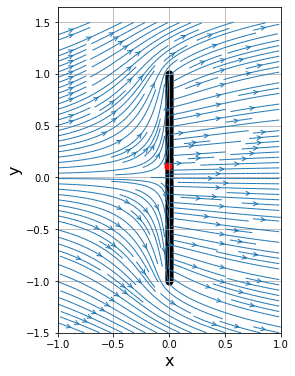

In [23]:
# plotting

width = 4
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->');

pyplot.scatter(x_source, y_source, color='black', s=50, marker='o');

magnitude = numpy.sqrt(u**2 + v**2)

j_stagn, i_stagn = numpy.unravel_index(magnitude.argmin(), magnitude.shape)

pyplot.scatter(x[i_stagn], y[j_stagn], color='red', s=50);

Now try to change the total strength of the sources. What is the minimal total source strength so that the dividing streamline ($\psi = 0$) encloses all the singularities?

### Line of infinite sources

By definition, a *source sheet* is an infinite collection of side-by-side sources of infinitesimal equal strength distributed along a given path.

We rember the streamline equation for a single source:

$$\psi = \frac{\sigma}{2\pi}\theta $$

Consider $s$ to be the running coordinate along the sheet: we define $\sigma = \sigma(s)$ as the strength per unit length.

Recall that the strength of a single source represents the volume flow rate per unit depth (i.e., per unit length in the $z$-direction).
Therefore, $\sigma$ represents the volume flow rate per unit depth and per unit length (in the $s$-direction). Thus, $\sigma ds$ is the strength of an infinitesimal portion $ds$ of the source sheet. This infinitesimal portion is so small that it can be treated as a distinct source of strength $\sigma ds$.

Following this, the stream-function at point $\left(r,\theta\right)$ of this infinitesimal portion is

$$d\psi\left(r,\theta\right) = \frac{\sigma ds}{2\pi} \theta$$

Integrating along $s$, we find the stream-function of the entire source sheet:

$$\psi\left(r,\theta\right) = \frac{\sigma}{2\pi}\int_{\text{sheet}}\theta\left(s\right)ds$$

In the previous section, we considered a vertical finite distribution of sources. Similarly, the stream function of a vertical source sheet at $x=0$ between $y_{\text{min}}$ and $y_{\text{max}}$ in Cartesian coordinates is

$$\psi\left(x,y\right) = \frac{\sigma}{2\pi}\int_{y_{\text{min}}}^{y_{\text{max}}} \tan^{-1}\left(\frac{y-s}{x}\right)ds$$

And the velocity components are

$$u\left(x,y\right) = \frac{\sigma}{2\pi} \int_{y_{\text{min}}}^{y_{\text{max}}} \frac{x}{x^2+\left(y-\xi\right)^2}d\xi$$

$$v\left(x,y\right) = \frac{\sigma}{2\pi} \int_{y_{\text{min}}}^{y_{\text{max}}} \frac{y-\xi}{x^2+\left(y-\xi\right)^2}d\xi$$

### Using SciPy

We need to calculate the two integrals above to obtain the velocities. Bummer, you say. Calculating integrals is so passé. Don't worry! We have SciPy: a powerful collection of mathematical algorithms and functions. It includes the module [`integrate`](http://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html), a fundamental set of functions for scientific computing including basic integration, quadrature rules and numerical integrators for ordinary differential equations. How helpful is that?

Let's import the module we need from SciPy:

In [24]:
#import integrate module

from scipy import integrate


We are going to use the function [`quad(func,a,b)`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad) of the module `integrate` to compute the definite integral of a function of one variable between two limits:

$$I=\int_a^b f(x)\ {\rm d}x$$

The first argument to the function `quad` needs to be a Python function ... you already know how to create a Python function using a `def` statement, but you'll learn a new way to create Python functions: the `lambda` statement. Why do I need two ways to define functions, you may ask? The answer is rather subtle, and the subject of full blog posts! (See below)

In short, a function created with a `lambda` statement is a single expression that returns a value (but without a `return` statement!). It is often called an *anonymous function*, because we don't need to give it a name.

Let's see how we use a `lambda` statement to integrate a mathematical function. Suppose we want to integrate the function $f:x\rightarrow x^2$ from $0$ to $1$. You can manually do this one, right? It gives the value $\frac{1}{3}$. 

To use the function `quad()`, we give it as first parameter the expression `lambda x : x**2`:

In [26]:
#test integrate function

integrate.quad(lambda x: x**2, 0.0, 1.0)



(0.33333333333333337, 3.700743415417189e-15)

You see, here we used the `lambda` statement to pass a function argument to `quad()`, without going through a function definition (in this sense, we talk of *anonymous* Python functions).

Note that the function `quad()` returns a list: the first element is the result of the integral, and the second element is an estimate of the error. If you just want the value of the definite integral, you need to specify the index `[0]`, for the first element of the list!

Note that the lambda function can accept several arguments:

In [41]:
# another test integrate function

a = 3.0
b = 2.0

integrate.quad(lambda x, a, b: a*b*x**2, 0.0, 1.0, args=(a,b))


(2.0, 2.220446049250313e-14)

We are ready to use this for our velocity calculations of the source sheet.

One last thing! The result of the integral, obtained with the function `quad()` is a float, so we would have to loop over our domain to compute the integral at each discrete point; this can become expensive as we refine our domain...
Unless we use [`numpy.vectorize()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html) that will allow us to create a vectorized function that takes Numpy arrays as inputs and returns a Numpy array!

In [62]:
sigma = 1.0    # strength of the source-sheet

# boundaries of the source-sheet
y_min, y_max = -1.0, 1.0

# create the anonymous functions
integrand_u = lambda s, x, y: x / (x**2 + (y - s)**2)
integrand_v = lambda s, x, y: (y - s) / (x**2 + (y - s)**2)

# create a dummy function to vectorize
def integration(x, y, integrand):
    return integrate.quad(integrand, y_min, y_max, args=(x, y))[0]

vec_integration = numpy.vectorize(integration)

# compute the velocity field generated by the source-sheet
u_sheet = sigma / (2.0 * numpy.pi) * vec_integration(X, Y, integrand_u)
v_sheet = sigma / (2.0 * numpy.pi) * vec_integration(X, Y, integrand_v)

# superposition of the source-sheet to the uniform flow
u_tot = u_freestream + u_sheet
v_tot = v_freestream + v_sheet

Let's now visualize the streamlines (blue) on the mesh grid. We draw a red line to show the source sheet and a filled contour to visualize the location of the stagnation point.

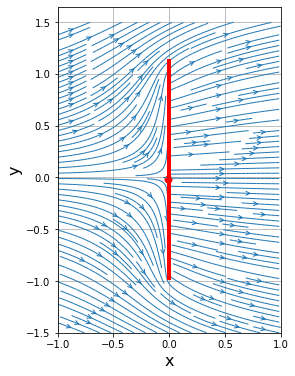

In [72]:
# plotting

# plotting

width = 4
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

pyplot.streamplot(X, Y, u_tot, v_tot, density=2, linewidth=1, arrowsize=1, arrowstyle='->');

pyplot.axvline(0.0, (y_min-y_start)/(y_end - y_start), (y_max - y_start) / (y_end - y_start), color='red', linewidth=4);

magnitude = numpy.sqrt(u_tot**2 + v_tot**2)

j_stagn, i_stagn = numpy.unravel_index(magnitude.argmin(), magnitude.shape)

pyplot.scatter(x[i_stagn], y[j_stagn], color='red', s=50);

Help on Line2D in module matplotlib.lines object:

class Line2D(matplotlib.artist.Artist)
 |  Line2D(xdata, ydata, linewidth=None, linestyle=None, color=None, marker=None, markersize=None, markeredgewidth=None, markeredgecolor=None, markerfacecolor=None, markerfacecoloralt='none', fillstyle=None, antialiased=None, dash_capstyle=None, solid_capstyle=None, dash_joinstyle=None, solid_joinstyle=None, pickradius=5, drawstyle=None, markevery=None, **kwargs)
 |  
 |  A line - the line can have both a solid linestyle connecting all
 |  the vertices, and a marker at each vertex.  Additionally, the
 |  drawing of the solid line is influenced by the drawstyle, e.g., one
 |  can create "stepped" lines in various styles.
 |  
 |  Method resolution order:
 |      Line2D
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, xdata, ydata, linewidth=None, linestyle=None, color=None, marker=None, markersize=None, markeredgewidth=None, markeredgec

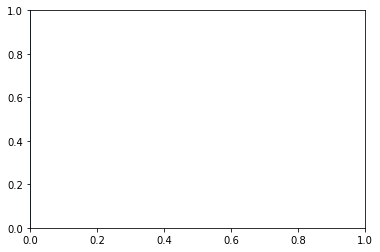

In [67]:
# how is axvline defined???

help(pyplot.axvline())


We said that the strength $\sigma$ represents a volume flow rate emanating from the source sheet. If you play with this parameter, you will see that the stagnation point comes closer and closer to the source sheet with decreasing strength.

If we wanted to use multiple source sheets to represents the streamlines around a given body shape, we need to make each source sheet part of the dividing streamline. The question will be *What is the source strength to make this happen?*

The volume flow rate on just the left side of the sheet is $\frac{\sigma}{2}$, flowing in the opposite direction of the freestream velocity $U_\infty$.
Therefore, the flow-tangency boundary condition required is $\frac{\sigma}{2} = U_\infty$.

Now go back to the code above an replace the `sigma` by the correct value. *Where is the stagnation point? Where is the dividing streamline?*

### Using theoretical integration

We found that the expression for the velocity compnents of an infinite line of source are:


$$u\left(x,y\right) = \frac{\sigma}{2\pi} \int_{y_{\text{min}}}^{y_{\text{max}}} \frac{x}{x^2+\left(y-\xi\right)^2}d\xi$$

$$v\left(x,y\right) = \frac{\sigma}{2\pi} \int_{y_{\text{min}}}^{y_{\text{max}}} \frac{y-\xi}{x^2+\left(y-\xi\right)^2}d\xi$$

we could mathematically solve those integrals by hand (try it if you can) or by by using any software (Wolfram Alpha for example), and we get that:

$$ \int \frac{x}{x^2+\left(y-\xi\right)^2}d\xi = -\tan^{-1}\frac{y-\xi}{x}+C$$

$$ \int \frac{y-\xi}{x^2+\left(y-\xi\right)^2}d\xi = -\frac{1}{2}\ln\left(x^2+(y-\xi)^2\right)+C$$



So we could write the velocity components as:

$$u\left(x,y\right) = -\frac{\sigma}{2\pi} \left( \tan^{-1}\frac{y-y_{max}}{x}-\tan^{-1}\frac{y-y_{min}}{x} \right)$$

$$v\left(x,y\right) = -\frac{\sigma}{4\pi} \left( \ln\frac{x^2+(y-y_{max})^2}{x^2+(y-y_{min})^2} \right)$$

#### Try to implement these equations and compare with previous calculations

In [75]:
#calculating velocity field with formal mathematical integration

sigma = 1.0
y_min, y_max = -1.0, 1.0

u_sheet_theo = -(sigma / (2 * numpy.pi)) * ((numpy.arctan((Y - y_max)/(X))) - (numpy.arctan((Y - y_min)/(X))))
v_sheet_theo = -(sigma / (4 * numpy.pi)) * (numpy.log((X**2 + (Y - y_max)**2) / (X**2 + (Y - y_min)**2)))

u_tot_theo = u_sheet_theo + u_freestream
v_tot_theo = v_sheet_theo + v_freestream

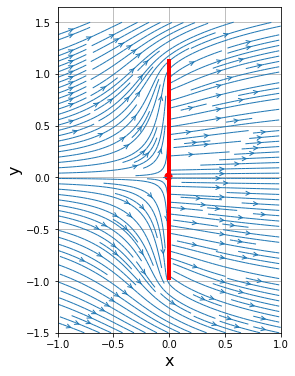

In [76]:
#plotting the theoretical calculation

# plotting

# plotting

width = 4
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

pyplot.streamplot(X, Y, u_tot_theo, v_tot_theo, density=2, linewidth=1, arrowsize=1, arrowstyle='->');

pyplot.axvline(0.0, (y_min-y_start)/(y_end - y_start), (y_max - y_start) / (y_end - y_start), color='red', linewidth=4);

magnitude = numpy.sqrt(u_tot_theo**2 + v_tot_theo**2)

j_stagn, i_stagn = numpy.unravel_index(magnitude.argmin(), magnitude.shape)

pyplot.scatter(x[i_stagn], y[j_stagn], color='red', s=50);



## Learn more

The `lambda` statement can be especially confusing when you are starting out with Python. Here are a couple of places to dig deeper: 

* an interesting blog post that treats the subtleties of lambdas: [Yet Another Lambda Tutorial](http://pythonconquerstheuniverse.wordpress.com/2011/08/29/lambda_tutorial/) at the "Python Conquers the Universe" blog (29 August 2011)
* the chapter on ["Anonymous functions: lambda"](https://www.inkling.com/read/learning-python-mark-lutz-4th/chapter-19/anonymous-functions-lambda) of the *Learning Python* book by Mark Lutz.

---